In [1]:

# !pip install ipykernel

import os 

os.chdir('/home/DISCOVER_summer2022/xusc/exp/Cerberus-main')
# from dataloaders.datasets.nyud_geonet import NYUD_GeoNet

from dataloaders.datasets.iiw_dataset import IIWDataset
import matplotlib.pyplot as plt

import scipy.io as scio
from eval_tools.iiw_evaluator import IIWEvaluator

from os.path import join, split, exists, isdir, isfile
from utils import * 
import torchvision.transforms as transforms 

plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率



from utils.entity.iiw_checker import *
from utils.entity.iiw_qualitative_selector import *



Bad key text.latex.preview in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('s

## draw qualitative result 
### 1. get the recall or each datasets
### 2. pick up the best 

In [2]:

dataset = IIWDataset(data_dir='/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/data/IIW/iiw-dataset',split='test')


ours_path = '/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/networks/need2release/iiw_1'
rindnet_root = '/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/networks/need2release/run_iiw'
        
ours = QulitativeSelector(ours_path,dataset,dataset_name='ours')
hed = QulitativeSelector(join(rindnet_root,'hed'),dataset,dataset_name = 'hed')
dff = QulitativeSelector(join(rindnet_root,'dff'),dataset,dataset_name = 'dff')
rcf = QulitativeSelector(join(rindnet_root,'rcf'),dataset,dataset_name = 'rcf')
rindnet = QulitativeSelector(join(rindnet_root,'rindnet'),dataset,dataset_name = 'rindnet')




In [3]:
best_qualitative_results = get_best_idx(main_dict=ours.get_quantitative_results_for_images(),
                                other_dict_list= [hed.get_quantitative_results_for_images(),
                                dff.get_quantitative_results_for_images(),rcf.get_quantitative_results_for_images(),
                                rindnet.get_quantitative_results_for_images()])
best_names  = [ x[0] for x in best_qualitative_results[:40]]                                
needed = [ x.split('.')[0] for x in best_names]

/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/utils/entity/iiw_qualitative_selector.py:37: RuntimeWarning: Mean of empty slice.
  mean_metric_dict[file_name] = np.array(list(data.values())).mean()
/home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### draw origin images

In [5]:
from tqdm import tqdm
to_imger = transforms.ToPILImage()

save_dir = 'logs/iiw_results_analysis/origin_imgs'
make_dir(save_dir)
for name in needed:

    image, points, labels, image_name, same_image = dataset.getitem(dataset.name2idx(name))
    image = to_imger(normalize(image))
    
    image = np.array(image)
    image = draw_all_pairs(image,points,labels,shape = np.array(image.shape[:-1]))
    # image = draw_all_pairs(image,points,labels)

    save_name = join(save_dir,image_name+'.png')
    
    
    # image = check_img(image)
    cv2.imwrite(save_name,image[:,:,::-1])
        

###  draw and save the comparison 

1232.mat
not exist
105931.mat
not exist
112869.mat
not exist
89105.mat
not exist
88741.mat
not exist
34465.mat
not exist
104478.mat
not exist
96131.mat
not exist
94480.mat
not exist
92952.mat
not exist
55736.mat
not exist
103422.mat
not exist
4032.mat
not exist
101693.mat
not exist
94190.mat
not exist
35796.mat
not exist
96511.mat
not exist
41375.mat
not exist
103924.mat
not exist
88841.mat
not exist
89491.mat
not exist
104648.mat
not exist
113764.mat
not exist
96864.mat
not exist
103335.mat
not exist
87162.mat
not exist
99200.mat
not exist
114414.mat
not exist
89060.mat
not exist
99880.mat
not exist
102570.mat
not exist
103536.mat
not exist
11139.mat
not exist
93322.mat
not exist
99564.mat
not exist
109805.mat
not exist
104537.mat
not exist
101984.mat
not exist
4496.mat
not exist


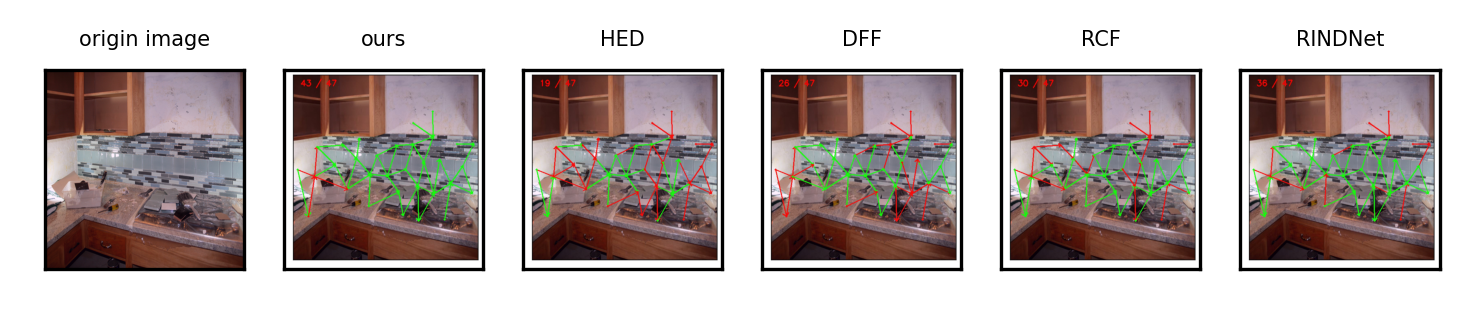

In [6]:


tmp_path = 'logs/iiw_results_analysis/tmp'
make_dir(tmp_path)
threshold_pickup = 0.6
for name in [x.replace('json','mat') for x in best_names][1:]:
    # image = image[:,:,::-1]
    print(name)
    
    save_name  = join(tmp_path,name.replace('mat','.png'))
    
    if not exists(save_name):
        print('not exist')
        image,pints,labels, pred, image_name= ours.checker.getitem(ours.checker.name2idx(name))
        
        comparison = [image] +ours.get_qualitatve_results(name,threshold_pickup) +hed.get_qualitatve_results(name,threshold_pickup) + \
                    dff.get_qualitatve_results(name,threshold_pickup) + rcf.get_qualitatve_results(name,threshold_pickup) +rindnet.get_qualitatve_results(name,threshold_pickup)

        show_imgs(comparison,[0]*len(comparison),titles= ['origin image','ours','HED','DFF','RCF','RINDNet'],axis =0,img_name=save_name)
    else:
        print('exist')
        show_imgs([imread(save_name)[:,:,::-1]],[0])
    
    
    